# convert_longitude

- some files (espicially netcdf files) uses longitude values from 0 degrees to 360 degrees, instead of the usual,
GIS-standard, arrangement of -180 degrees to 180 degrees for longitude centered on the Prime Meridian, and -90 degrees
to 90 degrees for latitude centered on the Equator. the `convert_longitude` method corrects such behavior.

- to run this notebook make sure that the currect work directory points to the root directory of the pyramids package

In [1]:
from pyramids.dataset import Dataset
path = r"../../examples/data/geotiff/noah-precipitation-1979.tif"

## Read the raster file

In [2]:
dataset = Dataset.read_file(path)

In [3]:
print(dataset)


            Top Left Corner: (0.0, 90.0)
            Cell size: 0.5
            Dimension: 360 * 720
            EPSG: 4326
            Number of Bands: 4
            Band names: ['Band_1', 'Band_2', 'Band_3', 'Band_4']
            Band colors: {0: 'gray_index', 1: 'undefined', 2: 'undefined', 3: 'undefined'}
            Band units: ['', '', '', '']
            Scale: [1.0, 1.0, 1.0, 1.0]
            Offset: [0, 0, 0, 0]
            Mask: -9.969209968386869e+36
            Data type: float32
            File: ../../examples/data/geotiff/noah-precipitation-1979.tif
        


In [4]:
print(f"Min longitude: {min(dataset.lon)}")
print(f"Max longitude: {max(dataset.lon)}")

Min longitude: 0.25
Max longitude: 359.75


## Plot the first band in the raster

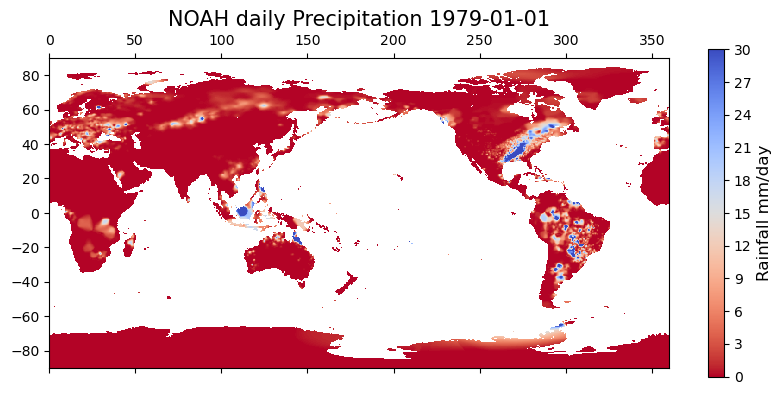

In [11]:
cleo = dataset.plot(
    band=0, figsize=(10, 5), title="NOAH daily Precipitation 1979-01-01", cbar_label="Rainfall mm/day", vmax=30,
    cbar_length=0.85
)

## use the `convert_longitude` to convert the longitude values to range between -180 and 180.

In [6]:
new_dataset = dataset.convert_longitude()

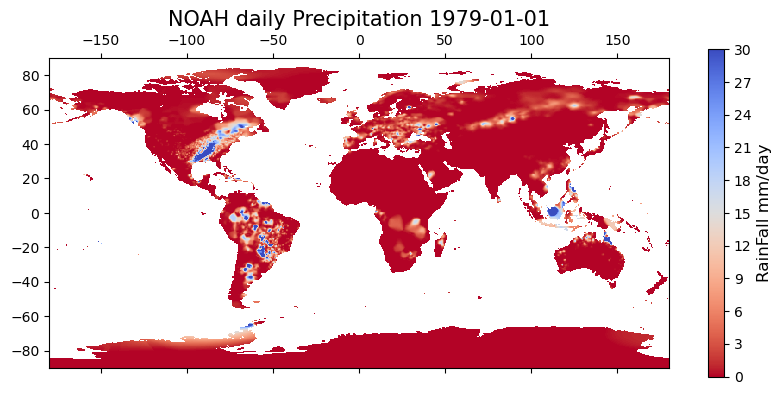

In [10]:
cleo = new_dataset.plot(
    band=0, figsize=(10, 5), title="NOAH daily Precipitation 1979-01-01", cbar_label="RainFall mm/day", vmax=30,
    cbar_length=0.85
)

In [8]:
print(f"Min longitude: {min(new_dataset.lon)}")
print(f"Max longitude: {max(new_dataset.lon)}")

Min longitude: -179.75
Max longitude: 179.75


In [9]:
new_dataset.to_file("../../examples/data/geotiff/noah-precipitation-1979-corrected.tif")